# Scikit-learn ML 기본동작

---

1) 데이터 수집 & 준비 단게
2) 데이터 전처리
    - 데이터 / 타겟 분리
    - 데이터 표준화 / 정규화
    - 타겟(라벨) 인코딩  

3) 학습 위한 데이터 준비
- 데이터 셋
    * 학습용 데이터셋   : 학습
    * 검증용 데이터셋   : 모델 생성 중에 사용
    * 테스트용 데이터셋 : 모델 완성 후 사용

4) 학습 모델 생성
    - 학습 방법 선정 및 모델 객체 생성
    - 학습 진행
        * **모델 파라미터 최적화** => 학습에 의해서 결정되는 파라미터
        * 최적의 모델 파라미터를 찾기 위한 방법 => **최적화(optimizer)**
        * 가중치와 절편
    - 모델 평가
        * 성능 개선 => **하이퍼 파라미터** (모델마다 다름) : **모델 튜닝**
        * 예) KNN에서 k 개 설정, 학습 횟수, 학습 크기(배치 사이즈), 규제 값들

5) 모델 테스트
    - 학습에 사용되지 않은 데이터를 활용 (새로운 데이터로 테스트 진행)


In [1]:
# 모듈 로딩 ----------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## [1] 데이터 준비
---

In [2]:
# 데이터 생성
X = [2,4,6,8,10,12]
y = [40, 50, 60, 70, 80, 90]

## [2] 데이터 분포 분석 => EDA => 시각화
---
시각화를 통해 Feature 자체의 파악과 상관관계 파악, 영향력 있는 Feature 추출

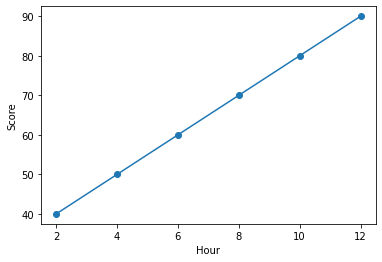

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, marker='o')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

- 시간과 점수는 비례관계
- 선형의 데이터 분포
- 독립변수 : hour / 종속변수 : score

In [4]:
# 학습에 사용되는 형태로 데이터 변환
import pandas as pd

df = pd.DataFrame({'Hour' : X, 'Score':y})
df.shape

(6, 2)

In [5]:
import numpy as np

arrX = np.array(X)
arrY = np.array(y)

print(arrX.shape, arrY.shape)

(6,) (6,)


In [6]:
# 1차원 => 2차원
arrX = arrX.reshape(-1, 1)
print(arrX.shape, arrY.shape)

(6, 1) (6,)


## [3] 학습 방법 선택 및 모델 생성
---
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도학습
- 선형 데이터 분포 => 선형 모델 적용

In [7]:
# model 생성
model = LinearRegression()

# model 학습
model.fit(arrX, arrY)

LinearRegression()

In [8]:
# 모델 파라미터 => 가중치, 절편
print('가중치 :', model.coef_, '절편 :', model.intercept_)

가중치 : [5.] 절편 : 29.999999999999993


## [4] 모델 평가
---
- 테스트(검증) 데이터로 평가
- score()
    * 분류 : 정답 --- 예측답 => 맞춘 정도
        - **정확도(accuracy)**
    * 회귀 : 정답 --- 예측답 => 차이 오차(Error)
        - 손실함수(Loss/Cost Function) : MSE, MAE, RMSE (낮을 수록 좋음)
        - **$R^2$ 계수 : 0 ~ 1 사이(높을 수록 좋음)**

In [9]:
#회귀의 결정계수(R^2) 값을 반환
model.score(arrX, arrY)

1.0

In [11]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

preY = model.predict(arrX)
mae = mean_absolute_error(arrY, preY)
mse = mean_squared_error(arrY, preY)

print(preY)
print(mae, mse)

[40. 50. 60. 70. 80. 90.]
1.1842378929335002e-15 8.414516322357459e-30
